In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("paris_data.csv",sep=";")

Was beschreiben die Daten?



Die Daten beschreiben Wohnungsangebote mit verschiedenen Attributen wie Anzahl der Zimmer, Wohnfläche, Etage, Mietpreis und weiteren Ausstattungsmerkmalen.

Warum sind die Daten relevant oder interessant?

Diese Daten sind relevant, um Einblicke in den Wohnungsmarkt zu erhalten und um zu verstehen, welche Faktoren den Mietpreis beeinflussen.

Welche Daten sind enthalten? 

In [3]:
print("Die Daten enthalten folgende Spalten :")
for i,feature in enumerate(dataset.columns):
    print(i," - ", feature)

Die Daten enthalten folgende Spalten :
0  -  url
1  -  title
2  -  rooms
3  -  area
4  -  floor
5  -  rent
6  -  location
7  -  double_glazing
8  -  iron
9  -  freezer
10  -  linen
11  -  tv
12  -  washing_machine
13  -  internet_included
14  -  air_conditioning
15  -  telephone_line
16  -  cable
17  -  satellite
18  -  dryer
19  -  dishwasher
20  -  terrace
21  -  toaster
22  -  coffee_maker
23  -  digicode
24  -  no_smoking
25  -  elevator
26  -  pets_accepted
27  -  swimming_pool
28  -  weekly_housekeeping
29  -  garage
30  -  intercom
31  -  concierge
32  -  basement
33  -  perfect_for_sharing
34  -  bike_storage
35  -  parking_lot_optional


Wie sind die Daten formatiert?

Die Daten sind in tabellarischer Form mit verschiedenen Datentypen 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   4891 non-null   object 
 1   title                 4891 non-null   object 
 2   rooms                 4891 non-null   int64  
 3   area                  4891 non-null   float64
 4   floor                 4891 non-null   int64  
 5   rent                  4891 non-null   float64
 6   location              4891 non-null   object 
 7   double_glazing        4891 non-null   int64  
 8   iron                  4891 non-null   int64  
 9   freezer               4891 non-null   int64  
 10  linen                 4891 non-null   int64  
 11  tv                    4891 non-null   int64  
 12  washing_machine       4891 non-null   int64  
 13  internet_included     4891 non-null   int64  
 14  air_conditioning      4891 non-null   int64  
 15  telephone_line       

 Welche Schritte haben Sie unternommen, um die Daten zu bereinigen?

-  Gibt es Ausreißer, Duplikate oder fehlende Werte?
    -    Da es keine fehlenden Werte gibt, müssen wir hier nichts weiter tun.
    -    keine Duplikate
    -    Außreiser existieren und wir haben diese gelöscht.

In [5]:
print("Anzahl der Duplikate:", dataset.duplicated().sum())

Anzahl der Duplikate: 0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

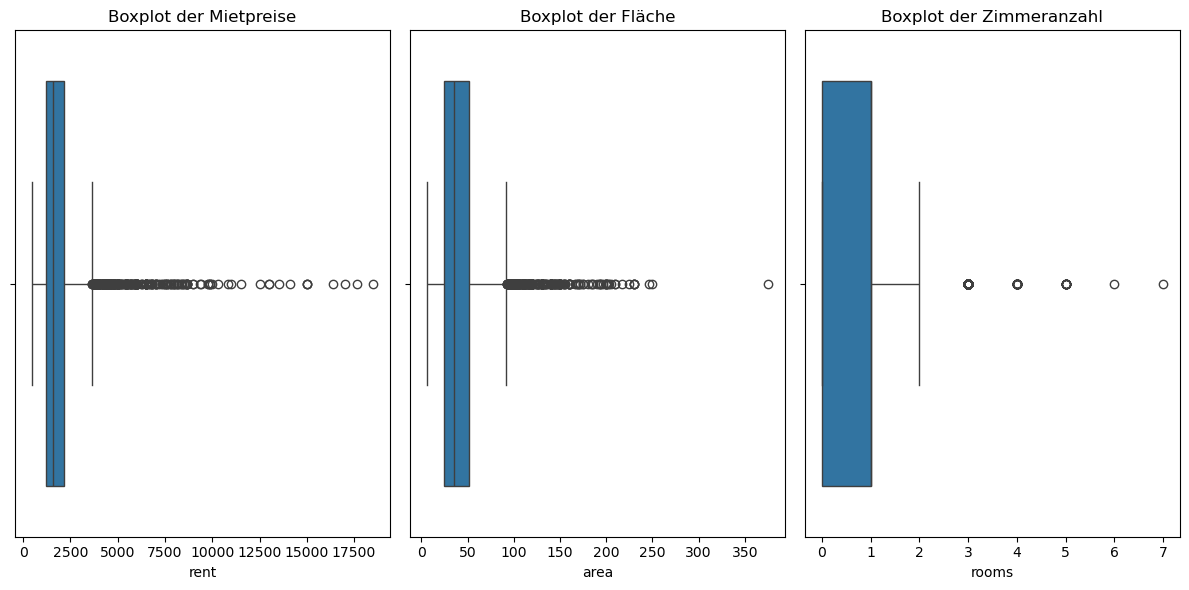

In [7]:
# Boxplot für Mietpreise, Fläche und Zimmeranzahl
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=dataset['rent'])
plt.title('Boxplot der Mietpreise')

plt.subplot(1, 3, 2)
sns.boxplot(x=dataset['area'])
plt.title('Boxplot der Fläche')

plt.subplot(1, 3, 3)
sns.boxplot(x=dataset['rooms'])
plt.title('Boxplot der Zimmeranzahl')

plt.tight_layout()
plt.show()

In [8]:
# Entfernen von Ausreißern (3 Standardabweichungen Regel)
mean_rent = dataset['rent'].mean()
std_rent = dataset['rent'].std()
dataset = dataset[(dataset['rent'] >= mean_rent - 3 * std_rent) & (dataset['rent'] <= mean_rent + 3 * std_rent)]

In [9]:
mean_area = dataset['area'].mean()
std_area = dataset['area'].std()
dataset = dataset[(dataset['area'] >= mean_area - 3 * std_area) & (dataset['area'] <= mean_area + 3 * std_area)]

In [10]:
mean_rooms = dataset['rooms'].mean()
std_rooms = dataset['rooms'].std()
dataset = dataset[(dataset['area'] >= mean_area - 3 * std_area) & (dataset['area'] <= mean_area + 3 * std_area)]

In [11]:
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Gibt es Fehler im Datensatz?
- Sind die Daten konsistent?

In [12]:
# Überprüfen, ob die Anzahl der Zimmer 
dataset = dataset[dataset['rooms'] >= 0]


In [13]:
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Überprüfen, ob die Wohnfläche und der Mietpreis positive Werte sind
dataset = dataset[dataset['area'] > 0]
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dataset = dataset[dataset['rent'] > 0]
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
bool_columns = ['double_glazing', 'iron', 'freezer', 'linen', 'tv', 'washing_machine',
                'internet_included', 'air_conditioning', 'telephone_line', 'cable',
                'satellite', 'dryer', 'dishwasher', 'terrace', 'toaster', 'coffee_maker',
                'digicode', 'no_smoking', 'elevator', 'pets_accepted', 'swimming_pool',
                'weekly_housekeeping', 'garage', 'intercom', 'concierge', 'basement',
                'perfect_for_sharing', 'bike_storage', 'parking_lot_optional']

In [17]:
for col in bool_columns:
    dataset = dataset[dataset[col].isin([0, 1])]
dataset.describe()


,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print('unique location number :',len(dataset['location'].unique()))
for idx,loc in enumerate(dataset['location'].unique()):
    print(idx,'-',loc)

unique location number : 27
0 - Paris 3°
1 - Paris 4°
2 - Val D'Oise
3 - Hauts-de-Seine
4 - Paris 15°
5 - Paris 20°
6 - Paris 7°
7 - Paris 18°
8 - Paris 10°
9 - Paris 14°
10 - Paris 5°
11 - Paris 9°
12 - Paris 16°
13 - Paris 13°
14 - Paris 2°
15 - Val de Marne
16 - Paris 8°
17 - Paris 6°
18 - Paris 1°
19 - Paris 17°
20 - Paris 11°
21 - Yvelines
22 - Paris 19°
23 - Seine St-Denis
24 - Paris 12°
25 - Seine Et Marne
26 - Essonne


- Welche Besonderheiten sind Ihnen aufgefallen?
    - Alle Spalten enthalten vollständige Datensätze ohne fehlende Werte. Das ist ungewöhnlich und weist darauf hin, dass die Quelle der Daten möglicherweise sehr gründlich gepflegt wird.
    - Es wurden einige extrem hohe Mietpreise identifiziert. Diese könnten entweder Fehler im Datensatz darstellen oder besonders luxuriöse Objekte. Diese Ausreißer wurden bereinigt, um die Analyse zu verbessern.
    -  Der Datensatz enthält eine sehr detaillierte Liste von Ausstattungsmerkmalen (z.B. air_conditioning, tv, dishwasher, swimming_pool). Dies bietet eine gute Grundlage für tiefgehende Analysen, könnte aber auch bedeuten, dass die Daten aus einer hochpreisigen Segmentierung des Marktes stammen.

# Datenexploration, Statistische Analyse und Visualisierung

- Welche Daten erscheinen Ihnen besonders relevant?    - rooms (Anzahl der Zimmer)
    - area (Wohnfläche)
    - floor
    - location

- Wie sind die Daten verteilt?

In [19]:
numerische_daten = dataset[["rooms","area","rent","floor"]]

In [20]:
numerische_daten.describe()

,rooms,area,rent,floor
count,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,1739.361259,3.109930
std,0.798815,20.492054,792.812703,2.743391
min,0.000000,6.000000,460.000000,0.000000
25%,0.000000,25.000000,1200.000000,1.000000
50%,1.000000,35.000000,1520.000000,3.000000
75%,1.000000,50.000000,2050.000000,5.000000
max,4.000000,114.000000,5900.000000,44.000000


Welche statistischen Werte erscheinen Ihnen besonders relevant, um die Daten zu beschreiben?

Relevante Statistische Werte:

- Mittelwert (Mean):
    - Der Durchschnittswert eines Merkmals, z.B. der durchschnittliche Mietpreis oder die durchschnittliche Fläche. Dies hilft, einen Überblick über die allgemeinen Daten zu erhalten.

- Median:
    - Der Median gibt den mittleren Wert an, wenn alle Daten nach Größe sortiert sind. Der Median ist besonders nützlich, um den Einfluss von Ausreißern zu minimieren, da er nicht durch extrem hohe oder niedrige Werte verzerrt wird.

- Standardabweichung (Standard Deviation):
    - Sie zeigt, wie stark die Werte um den Mittelwert streuen. Eine hohe Standardabweichung bedeutet, dass die Werte weit gestreut sind, eine niedrige Standardabweichung bedeutet, dass die Werte eng beieinander liegen.

- Minimale und Maximale Werte (Min, Max):
    - Diese Werte geben die niedrigsten und höchsten Werte eines Merkmals an, was hilft, Ausreißer und extreme Werte zu identifizieren.

- Kurtosis und Schiefe (Skewness):

    - Schiefe (Skewness) zeigt an, ob die Daten symmetrisch sind. Ein positiver Wert zeigt eine Rechtsverschiebung, ein negativer Wert eine Linksverschiebung der Verteilung.
    - Kurtosis misst, wie spitz oder flach die Verteilung im Vergleich zu einer normalen Verteilung ist.

- Korrelationskoeffizient (Correlation Coefficient):
    - Der Korrelationskoeffizient hilft, den linearen Zusammenhang zwischen zwei Variablen zu messen (z.B. zwischen der Fläche und dem Mietpreis). Werte nahe 1 oder -1 deuten auf eine starke Korrelation hin, während Werte nahe 0 auf eine schwache oder keine Korrelation hinweisen.

Welche Art der Visualisierung wird eingesetzt und wieso?

- Histogramme
    - Histogramme bieten eine gute Möglichkeit, die Verteilung einer einzelnen Variablen zu visualisieren. Sie zeigen, wie oft Werte in einem bestimmten Bereich vorkommen.
    - Besonders nützlich für Mietpreise, Wohnfläche und Zimmeranzahl, um die Häufigkeit verschiedener Preis- oder Flächenklassen zu sehen.
 
- Boxplot
    -  Ein Boxplot zeigt den Median, den Interquartilsabstand (IQR), sowie Ausreißer. Dies ist besonders nützlich, um die Streuung der Daten zu verstehen und extreme Werte zu identifizieren.
    -  Es ist hilfreich, um die Verteilung von Mietpreisen, Wohnflächen und Zimmeranzahlen zu sehen.
 
- Korrelation Heatmap
    - Eine Heatmap zeigt die Korrelationen zwischen den Variablen. Dies ist besonders nützlich, um zu verstehen, welche Merkmale miteinander korrelieren und potenziell für Vorhersagen zusammen verwendet werden können.
- Violinplot
    - Violinplot zeigt die Verteilung der Daten über mehrere Stadtteile hinweg und stellt gleichzeitig die Dichte der Daten dar. Dadurch kann man auf einen Blick erkennen, in welchen Preisbereichen sich die meisten Mietpreise befinden.
    - Der Violinplot kombiniert die Eigenschaften eines Boxplots (Median, Quartile) und eines Kernel Density Plots (Verteilungsdichte). Dies ermöglicht eine umfassendere Darstellung der Datenverteilung als ein einfacher Boxplot.

Text(0, 0.5, 'Häufigkeit')

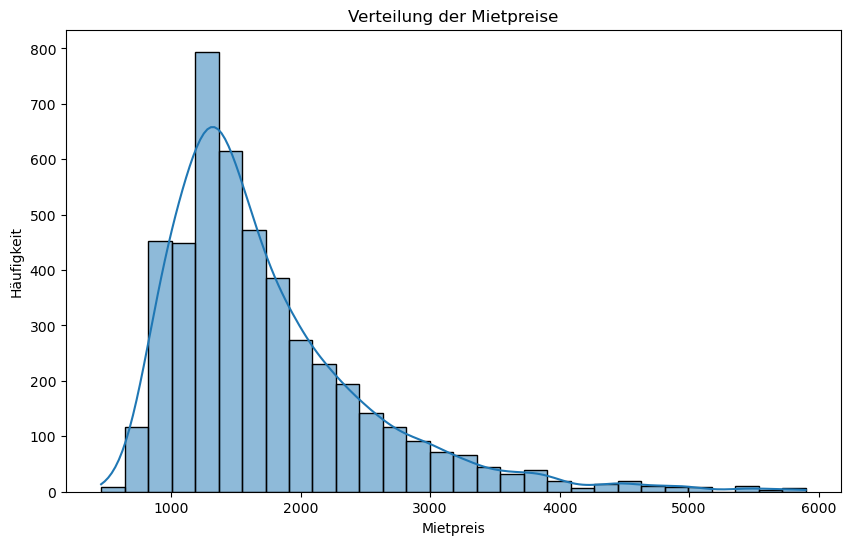

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['rent'], kde=True, bins=30)
plt.title('Verteilung der Mietpreise')
plt.xlabel('Mietpreis')
plt.ylabel('Häufigkeit')

Text(0, 0.5, 'Häufigkeit')

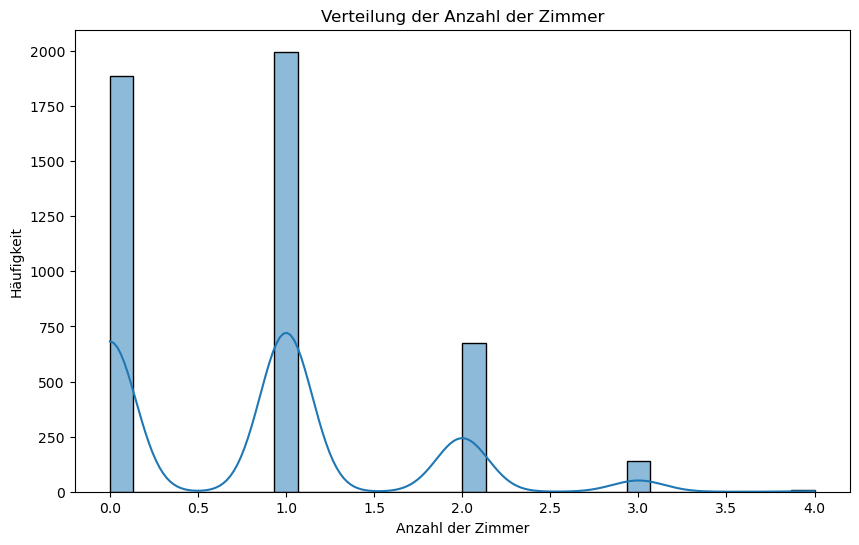

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['rooms'], kde=True, bins=30)
plt.title('Verteilung der Anzahl der Zimmer')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Häufigkeit')

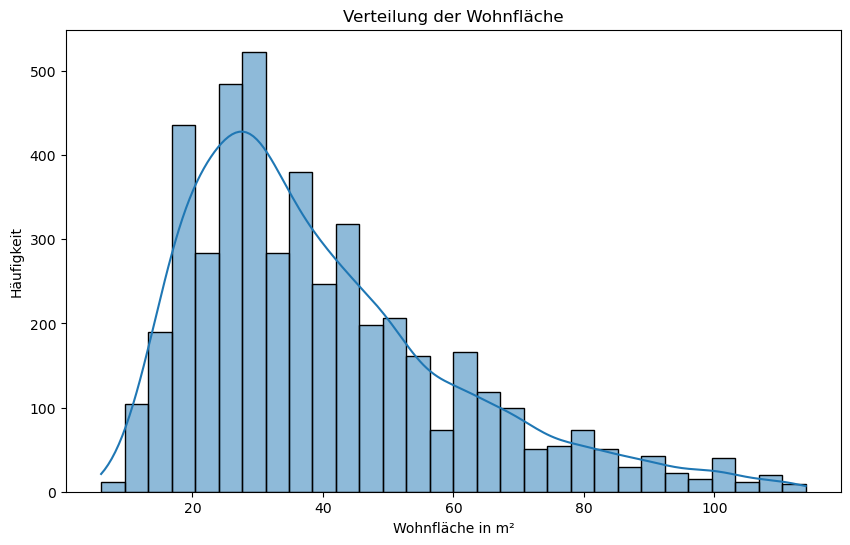

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['area'], kde=True, bins=30)
plt.title('Verteilung der Wohnfläche')
plt.xlabel('Wohnfläche in m²')
plt.ylabel('Häufigkeit')
plt.show()

Text(0, 0.5, 'Häufigkeit')

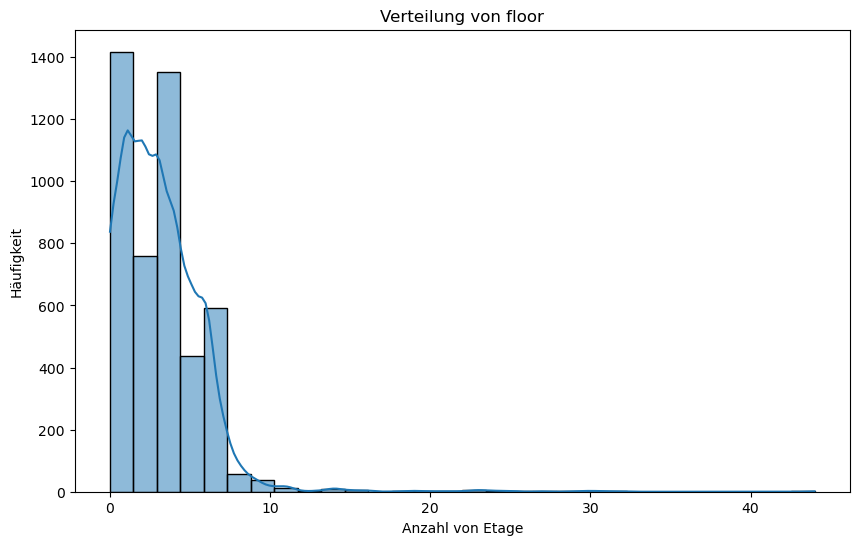

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['floor'], kde=True, bins=30)
plt.title('Verteilung von floor')
plt.xlabel('Anzahl von Etage')
plt.ylabel('Häufigkeit')

C:\Users\cihangir\AppData\Local\Temp\ipykernel_14480\3557910730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


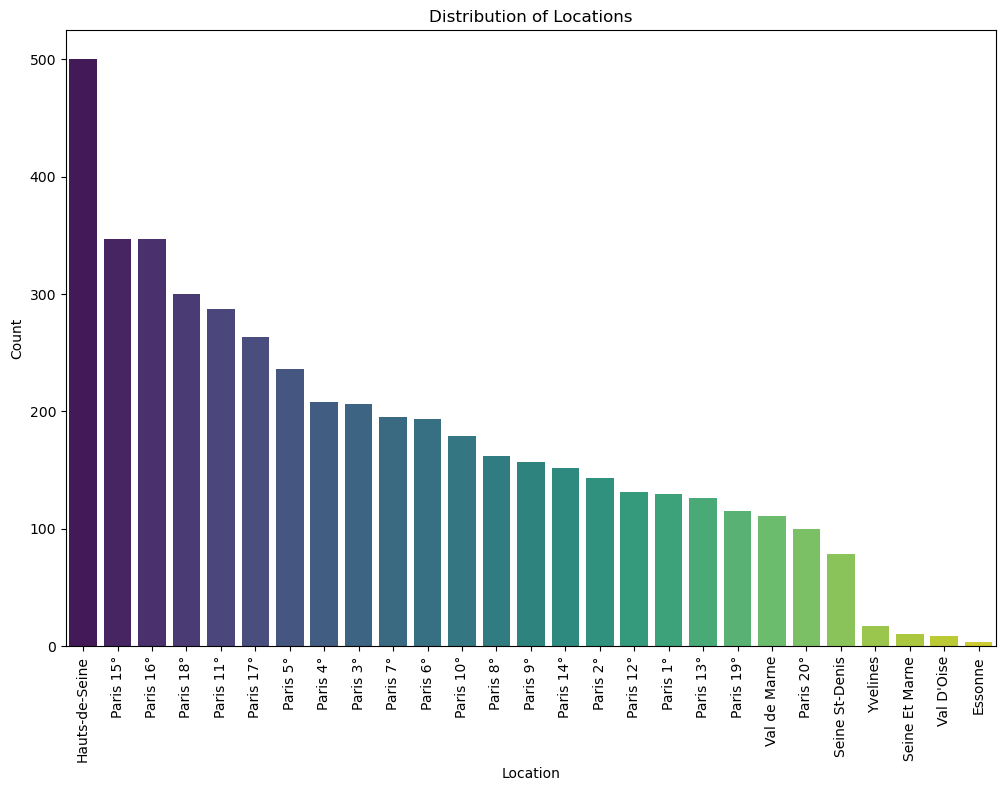

In [25]:
location_counts = dataset['location'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Locations')
plt.show()

C:\Users\cihangir\AppData\Local\Temp\ipykernel_14480\2741157245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='location', y='rent', data=dataset, palette="viridis")


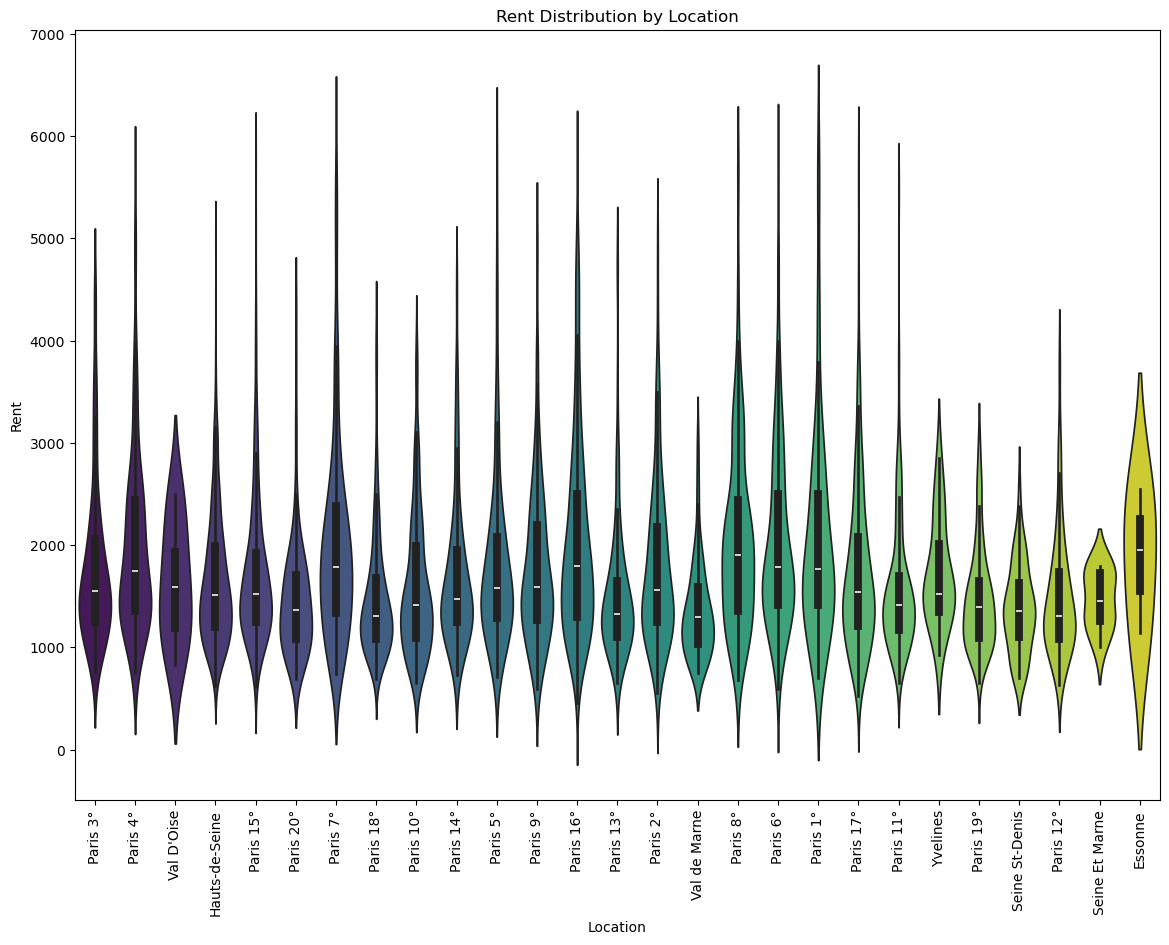

In [26]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='location', y='rent', data=dataset, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Rent')
plt.title('Rent Distribution by Location')
plt.show()

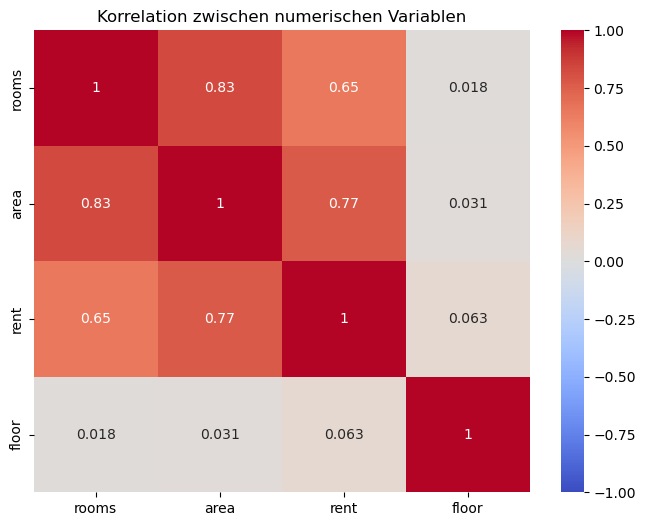

In [27]:
corr_matrix = numerische_daten.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelation zwischen numerischen Variablen')
plt.show()

- rooms und area (0.83):
    - Es gibt eine starke positive Korrelation zwischen der Anzahl der Räume (rooms) und der Fläche (area). Das bedeutet, dass Wohnungen mit mehr Räumen tendenziell auch eine größere Fläche haben. Dies ist eine erwartete und plausible Beziehung.
 
- area und rent (0.77):
    - Es besteht eine starke positive Korrelation zwischen der Fläche (area) und dem Mietpreis (rent). Dies zeigt, dass größere Wohnungen in der Regel auch teurer sind. Diese Korrelation ist in Immobilienmärkten typischerweise sehr ausgeprägt.
- rooms und rent (0.65):
    - Auch zwischen der Anzahl der Räume (rooms) und dem Mietpreis (rent) besteht eine positive Korrelation, wenn auch etwas schwächer als die zwischen area und rent. Wohnungen mit mehr Zimmern sind in der Regel teurer, was ebenfalls Sinn macht, aber es ist weniger stark ausgeprägt als die Korrelation mit der Fläche.
- floor und rent (0.031):
    - Die Korrelation zwischen der Etage (floor) und dem Mietpreis (rent) ist sehr gering. Es scheint keinen signifikanten Zusammenhang zu geben, was darauf hindeutet, dass die Etage keinen großen Einfluss auf den Mietpreis hat.
- floor und rooms/area:
    - Die Korrelation zwischen floor und den anderen Variablen (rooms, area, und rent) ist ebenfalls sehr gering. Die Etage hat keinen klaren Zusammenhang mit der Größe oder der Anzahl der Räume, was in vielen Fällen typisch ist.

- Fazit
    - Fläche (area) und Anzahl der Räume (rooms) sind die stärksten Prädiktoren für den Mietpreis. Diese Variablen haben die höchsten Korrelationen mit dem Mietpreis.
    - Etage (floor) hat eine sehr geringe Korrelation mit dem Mietpreis und ist daher möglicherweise weniger relevant für eine Vorhersage.

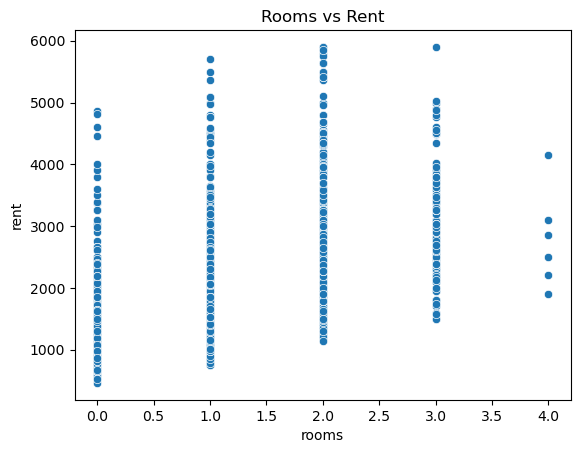

In [28]:
sns.scatterplot(data=numerische_daten, x='rooms', y='rent')
plt.title('Rooms vs Rent')
plt.show()

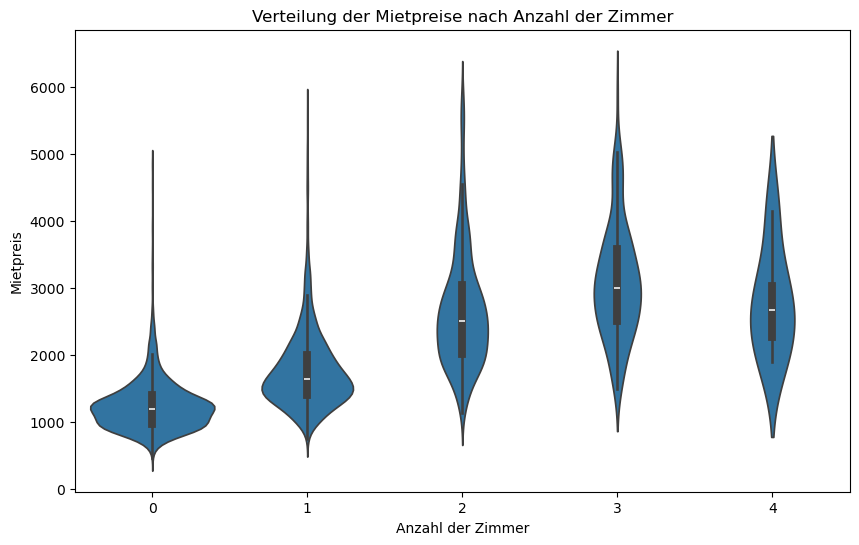

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='rooms', y='rent', data=dataset)
plt.title('Verteilung der Mietpreise nach Anzahl der Zimmer')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Mietpreis')
plt.show()

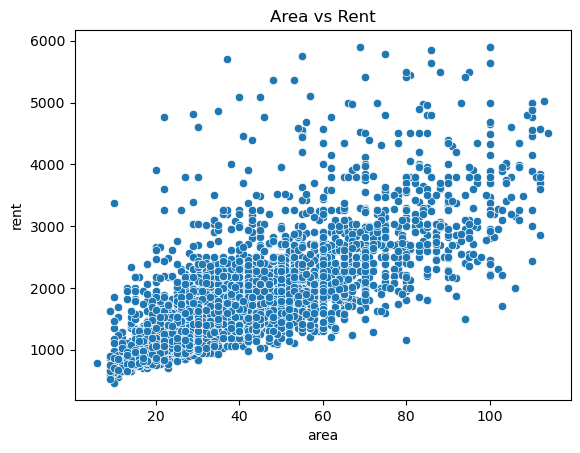

In [30]:
sns.scatterplot(data=numerische_daten, x='area', y='rent')
plt.title('Area vs Rent')
plt.show()

   Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)

In [31]:
numerische_daten['price_per_m2'] = numerische_daten['rent'] / numerische_daten['area']
dataset['price_per_m2'] = numerische_daten['price_per_m2']

C:\Users\cihangir\AppData\Local\Temp\ipykernel_14480\2537659768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerische_daten['price_per_m2'] = numerische_daten['rent'] / numerische_daten['area']


In [32]:
numerische_daten

,rooms,area,rent,floor,price_per_m2
0,2,88.0,3600.0,5,40.909091
1,0,17.0,1355.0,6,79.705882
2,3,102.0,2310.0,2,22.647059
3,1,52.0,1450.0,3,27.884615
4,1,30.0,1305.0,1,43.500000
...,...,...,...,...,...
4886,2,67.0,2640.0,7,39.402985
4887,2,70.0,1895.0,6,27.071429
4888,1,27.0,1150.0,2,42.592593
4889,1,43.0,1845.0,4,42.906977


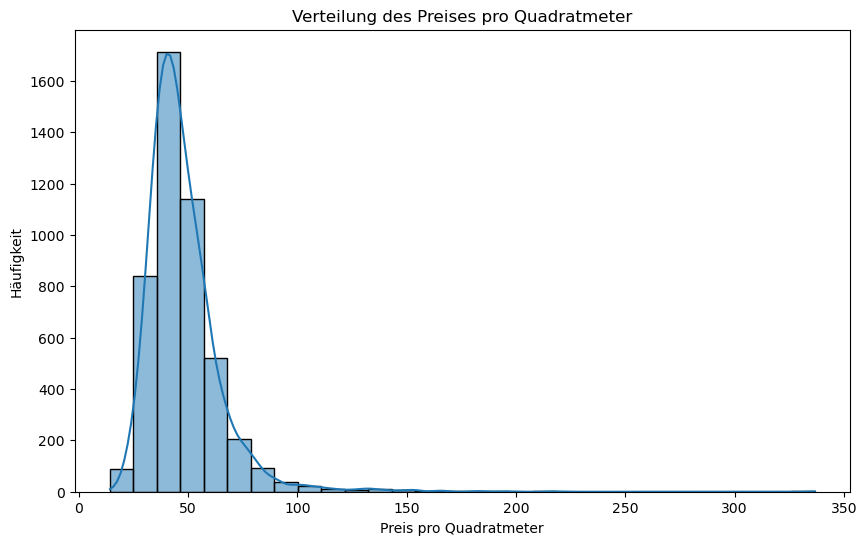

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['price_per_m2'], kde=True, bins=30)
plt.title('Verteilung des Preises pro Quadratmeter')
plt.xlabel('Preis pro Quadratmeter')
plt.ylabel('Häufigkeit')
plt.show()

 Welche Muster oder Trends lassen sich in den Daten erkennen?


Die Mietpreise zeigen eine hohe Variabilität, was durch die Standardabweichung und die Boxplots sichtbar wird. Es gibt sowohl sehr günstige als auch sehr teure Wohnungen im Datensatz, was möglicherweise auf Unterschiede in der Lage, Ausstattung oder anderen Faktoren zurückzuführen ist.

Es gibt einen deutlichen Unterschied zwischen den niedrigsten und höchsten Mietpreismodellen, was darauf hindeutet, dass der Markt eine breite Spanne an Optionen bietet (vom Budget- bis zum Premium-Segment).

   Welche praktischen Implikationen oder Empfehlungen können auf der Grundlage der Erkenntnisse aus den Daten gegeben werden?


- Empfehlungen für potenzielle Mieter oder Käufer
    - Mieter oder Käufer, die auf der Suche nach einer Wohnung sind, können die Daten verwenden, um eine realistische Vorstellung von den Mietpreismodellen in verschiedenen Stadtteilen zu bekommen. Das hilft ihnen, das Angebot zu vergleichen und zu entscheiden, ob eine Wohnung im Einklang mit der üblichen Preisgestaltung in ihrer gewünschten Gegend steht.
 
- Stadtplanung und politische Empfehlungen
    - Für Stadtplaner oder Politiker, die Wohnungsmarktreformen oder -regulierungen vornehmen möchten, könnten diese Daten zeigen, welche Art von Wohnungen in verschiedenen Stadtgebieten am gefragtesten sind und welche Preispunkte angesprochen werden müssen, um sowohl niedrige als auch mittlere Einkommensgruppen anzusprechen.
 


# Wahrscheinlichkeitsrechnung

Was ist die Wahrscheinlichkeit für das Auftreten der Ereignisse?


In [34]:
total_entries = len(dataset)

rent_above_2000 = dataset['rent'] > 2000
location_paris_15 = dataset['location'] == 'Paris 15°'
rooms_more_than_2 = dataset['rooms'] > 2


rent_above_2000_size = rent_above_2000.sum()
prob_rent_above_2000 = rent_above_2000_size / total_entries

location_paris_15_size = location_paris_15.sum()
prob_location_paris_15 = location_paris_15_size / total_entries


rooms_more_than_2_size = rooms_more_than_2.sum()
prob_rooms_more_than_2 = rooms_more_than_2_size / total_entries

print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt: {prob_rent_above_2000:.2%}')
print(f'Wahrscheinlichkeit, dass eine Wohnung in Paris 15° liegt: {prob_location_paris_15:.2%}')
print(f'Wahrscheinlichkeit, dass eine Wohnung mehr als 2 Zimmer hat: {prob_rooms_more_than_2:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt: 25.77%
Wahrscheinlichkeit, dass eine Wohnung in Paris 15° liegt: 7.38%
Wahrscheinlichkeit, dass eine Wohnung mehr als 2 Zimmer hat: 3.13%


Was ist die Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses?

In [35]:
prob_rent_above_2000_and_location_paris_15 = (rent_above_2000 & location_paris_15).sum()/ total_entries

prob_rent_above_2000_given_location_paris_15 = prob_rent_above_2000_and_location_paris_15  / prob_location_paris_15
print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung in Paris 15° ist: {prob_rent_above_2000_given_location_paris_15:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung in Paris 15° ist: 22.77%


In [36]:
prob_rent_above_2000_and_rooms_more_than2 = (rent_above_2000 & rooms_more_than_2).sum()/ total_entries

prob_rent_above_2000_given_roos_more_than2 = prob_rent_above_2000_and_rooms_more_than2  / prob_rooms_more_than_2
print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung mehr als 2 Zimmer hat: {prob_rent_above_2000_given_roos_more_than2:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung mehr als 2 Zimmer hat: 90.48%


Was ist die Wahrscheinlichkeit für das Auftreten des zweiten Ereignisses unter der Bedingung des Auftretens des ersten Ereignisses?

In [37]:
prob_location_paris_15_given_rent_above_2000 = prob_rent_above_2000_and_location_paris_15  / prob_rent_above_2000
print(f'Wahrscheinlichkeit, dass die Wohnung in Paris 15° ist, gegeben dass die Miete über 2000 Euro liegt : {prob_location_paris_15_given_rent_above_2000:.2%}')

Wahrscheinlichkeit, dass die Wohnung in Paris 15° ist, gegeben dass die Miete über 2000 Euro liegt : 6.52%


In [38]:
prob_roos_more_than2_given_rent_above_2000 = prob_rent_above_2000_and_rooms_more_than2  / prob_rent_above_2000
print(f'Wahrscheinlichkeit, dass die Wohnung mehr als 2 Zimmer hat , gegeben dass die Miete über 2000 Euro liegt: {prob_roos_more_than2_given_rent_above_2000:.2%}')

Wahrscheinlichkeit, dass die Wohnung mehr als 2 Zimmer hat , gegeben dass die Miete über 2000 Euro liegt: 10.97%


# Machinelles Lernen

Vorhersage der Mietpreise für Wohnungen in verschiedenen Stadtteilen von Paris basierend auf ihren Eigenschaften.
Der Mietpreis einer Wohnung hängt von verschiedenen Faktoren ab, wie z.B. der Anzahl der Zimmer, der Fläche, der Etage, den angebotenen Annehmlichkeiten und der Lage. Das Ziel ist es, ein Modell zu entwickeln, das den Mietpreis basierend auf diesen Faktoren vorhersagen kann. Dies kann Wohnungssuchenden helfen, bessere Entscheidungen zu treffen und Vermietern, die Preise ihrer Immobilien besser zu bestimmen.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
target = dataset['rent']
features = dataset.drop(columns=['rent','url','title'])

In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4703 entries, 0 to 4890
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rooms                 4703 non-null   int64  
 1   area                  4703 non-null   float64
 2   floor                 4703 non-null   int64  
 3   location              4703 non-null   object 
 4   double_glazing        4703 non-null   int64  
 5   iron                  4703 non-null   int64  
 6   freezer               4703 non-null   int64  
 7   linen                 4703 non-null   int64  
 8   tv                    4703 non-null   int64  
 9   washing_machine       4703 non-null   int64  
 10  internet_included     4703 non-null   int64  
 11  air_conditioning      4703 non-null   int64  
 12  telephone_line        4703 non-null   int64  
 13  cable                 4703 non-null   int64  
 14  satellite             4703 non-null   int64  
 15  dryer                 4703

In [42]:
features.head()

,rooms,area,floor,location,double_glazing,iron,freezer,linen,tv,washing_machine,...,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional,price_per_m2
0,2,88.0,5,Paris 3°,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,40.909091
1,0,17.0,6,Paris 4°,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,79.705882
2,3,102.0,2,Val D'Oise,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,22.647059
3,1,52.0,3,Hauts-de-Seine,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,27.884615
4,1,30.0,1,Paris 15°,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,43.500000


In [43]:
features_encoded = pd.get_dummies(features, columns=['location'], drop_first=True).astype('i')

In [44]:
features_encoded

,rooms,area,floor,double_glazing,iron,freezer,linen,tv,washing_machine,internet_included,...,location_Paris 5°,location_Paris 6°,location_Paris 7°,location_Paris 8°,location_Paris 9°,location_Seine Et Marne,location_Seine St-Denis,location_Val D'Oise,location_Val de Marne,location_Yvelines
0,2,88,5,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,17,6,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,102,2,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,52,3,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,30,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,2,67,7,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4887,2,70,6,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4888,1,27,2,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4889,1,43,4,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
numerical_columns = ['rooms','area','floor','price_per_m2']

In [46]:
scaler = StandardScaler()
features_encoded[numerical_columns] = scaler.fit_transform(features_encoded[numerical_columns])

In [258]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42) #random_state = 42

In [259]:
X_train.head()

,rooms,area,floor,double_glazing,iron,freezer,linen,tv,washing_machine,internet_included,...,location_Paris 5°,location_Paris 6°,location_Paris 7°,location_Paris 8°,location_Paris 9°,location_Seine Et Marne,location_Seine St-Denis,location_Val D'Oise,location_Val de Marne,location_Yvelines
1944,2.747292,2.207528,-0.769177,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1478,0.243316,-0.476724,-0.040075,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4702,-1.008671,-0.867161,-0.040075,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3792,0.243316,0.743391,0.689027,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3234,0.243316,-0.574333,1.053578,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [50]:
# Modell erstellen und trainieren
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred_lr = linear_reg.predict(X_test)

In [52]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Lineare Regression - MSE: {mse_lr}, R^2: {r2_lr}')

Lineare Regression - MSE: 90522.99517169889, R^2: 0.8589953799795056


In [53]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Entscheidungsbaum - MSE: {mse_tree}, R^2: {r2_tree}')

Entscheidungsbaum - MSE: 13197.378320935175, R^2: 0.9794428883856467


In [54]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'K-Nächste-Nachbarn - MSE: {mse_knn}, R^2: {r2_knn}')

K-Nächste-Nachbarn - MSE: 115613.13326248672, R^2: 0.8199133171175452


In [55]:
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.ylim(0, np.max(test_scores_mean) + np.std(test_scores_std))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\cihangir\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

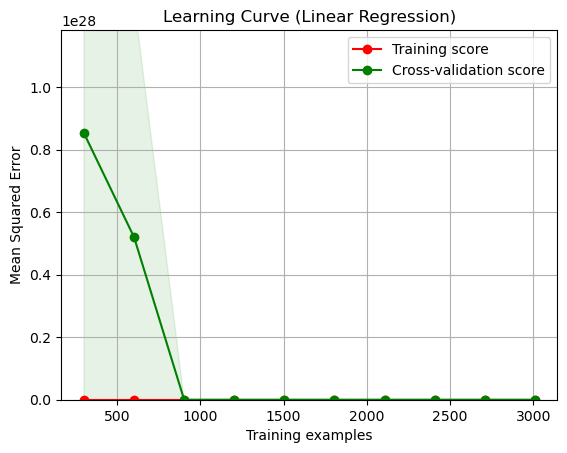

In [56]:
plot_learning_curve(linear_reg, X_train, y_train, title='Learning Curve (Linear Regression)') ## Überanpassung !!!!

<module 'matplotlib.pyplot' from 'C:\\Users\\cihangir\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

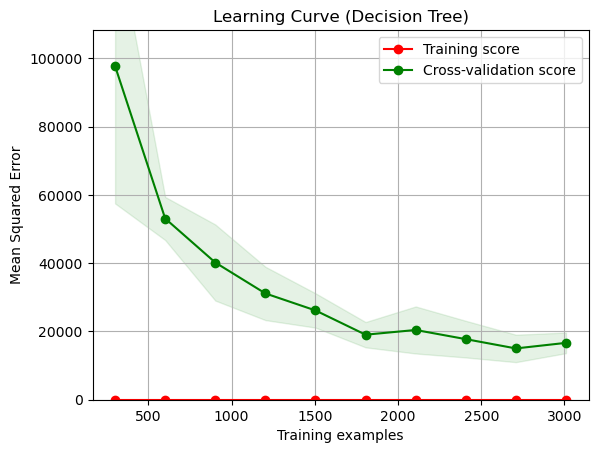

In [57]:
plot_learning_curve(tree_reg, X_train, y_train, title='Learning Curve (Decision Tree)') ## Überanpassung

<module 'matplotlib.pyplot' from 'C:\\Users\\cihangir\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

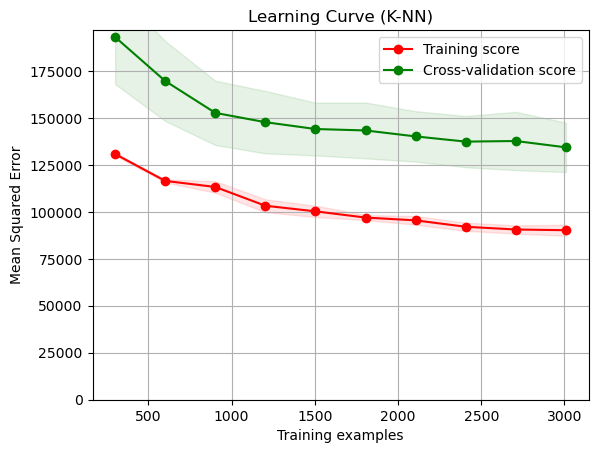

In [58]:
plot_learning_curve(knn_reg, X_train, y_train, title='Learning Curve (K-NN)') ## Underfit !!

- linear Regression : 
  - Die Trainingsfehler (rote Linie) sind sehr niedrig, was darauf hinweist, dass das Modell die Trainingsdaten sehr gut gelernt hat. Die Kreuzvalidierungsfehler (grüne Linie) sind jedoch anfangs sehr hoch und sinken dann drastisch, bevor sie stabil werden. Wir können Regularisierung wie Lasso oder Ridge Regression hinzufügen. Wir verwenden Lasso Regression wegen Feature Selection. Wir möchten die nicht relevante Features eliminieren.(Koeffizient 0)

In [59]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'alpha': [0.01, 0.1,0.15,0.2,0.25,0.3, 1, 10, 100]}
lasso_reg = Lasso()

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')

C:\Users\cihangir\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.848e+06, tolerance: 1.863e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\cihangir\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+07, tolerance: 1.874e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\cihangir\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.592e+07,

Best alpha: 0.1


In [61]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Lasso Regression - MSE: {mse}, R^2: {r2}')

Lasso Regression - MSE: 91192.83684773865, R^2: 0.8579519901665114


<module 'matplotlib.pyplot' from 'C:\\Users\\cihangir\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

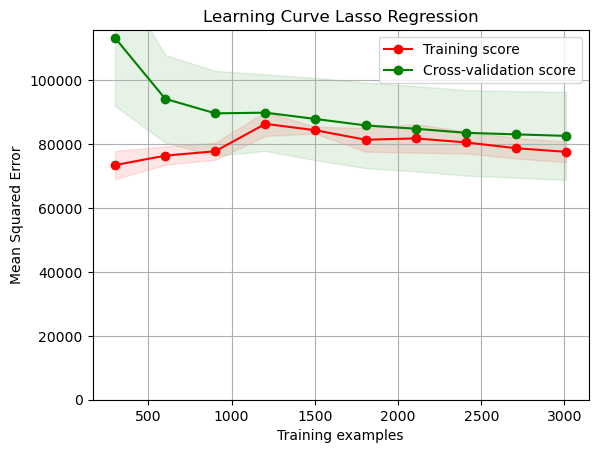

In [63]:
plot_learning_curve(grid_search.best_estimator_, X_train, y_train, title='Learning Curve Lasso Regression') ## Underfit 

In [65]:
ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')

Best alpha: 0.01


In [66]:
y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Lasso Regression - MSE: {mse}, R^2: {r2}')

Lasso Regression - MSE: 90563.01024334044, R^2: 0.8589330498504459


In [67]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.15, 0.55, 0.75, 0.95]}

elasticnet_reg = ElasticNet()


grid_search = GridSearchCV(elasticnet_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')
print(f'Best l1_ratio: {grid_search.best_params_["l1_ratio"]}')

Best alpha: 0.01
Best l1_ratio: 0.95


In [68]:
y_pred=  grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f'ElasticNet Regression - MSE: {mse}, R^2: {r2}')

ElasticNet Regression - MSE: 91027.76301367099, R^2: 0.8582091201167951


RandomizedSearch für DecisionTree

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_leaf_nodes': [None, 10, 20, 50],
}


dt_regressor = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=dt_regressor, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score (neg MSE):", random_search.best_score_)

Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 20, 'criterion': 'squared_error'}
Best cross-validation score (neg MSE): -15099.208122908778


In [71]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Decision Tree Model - MSE: {mse}, R^2: {r2}')

Best Decision Tree Model - MSE: 9714.252361553903, R^2: 0.9848684363522657


# Neural Network

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [305]:
model = Sequential()
model.add(Dense(35, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.0035))
model.add(Dense(35, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.0035))
model.add(Dense(35, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.0035))
model.add(Dense(1)) 

C:\Users\cihangir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [306]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mse'])

In [307]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.000001)

In [308]:
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping,reduce_lr])

Epoch 1/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3660791.2500 - mse: 3660791.2500 - val_loss: 3489136.5000 - val_mse: 3489136.5000 - learning_rate: 0.0010
Epoch 2/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3745619.0000 - mse: 3745619.0000 - val_loss: 3483798.5000 - val_mse: 3483798.5000 - learning_rate: 0.0010
Epoch 3/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3712433.0000 - mse: 3712433.0000 - val_loss: 3471236.0000 - val_mse: 3471236.0000 - learning_rate: 0.0010
Epoch 4/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3726871.0000 - mse: 3726871.0000 - val_loss: 3461972.2500 - val_mse: 3461972.2500 - learning_rate: 0.0010
Epoch 5/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3552830.5000 - mse: 3552830.5000 - val_loss: 3453007.5000 - val_mse: 3453007.5000 - learning_rate: 0.0010
Epoch 6/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3635314.2500 - mse: 3635314.2500 - val_loss: 3391917.0000 - val_mse: 3391917.0000 - learning_rate: 0.0010
Epoch 7/20

In [309]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_loss}, Test MAE: {test_mae}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2610.4119 - mse: 2610.4119 
Test MSE: 3598.3369140625, Test MAE: 3598.3369140625


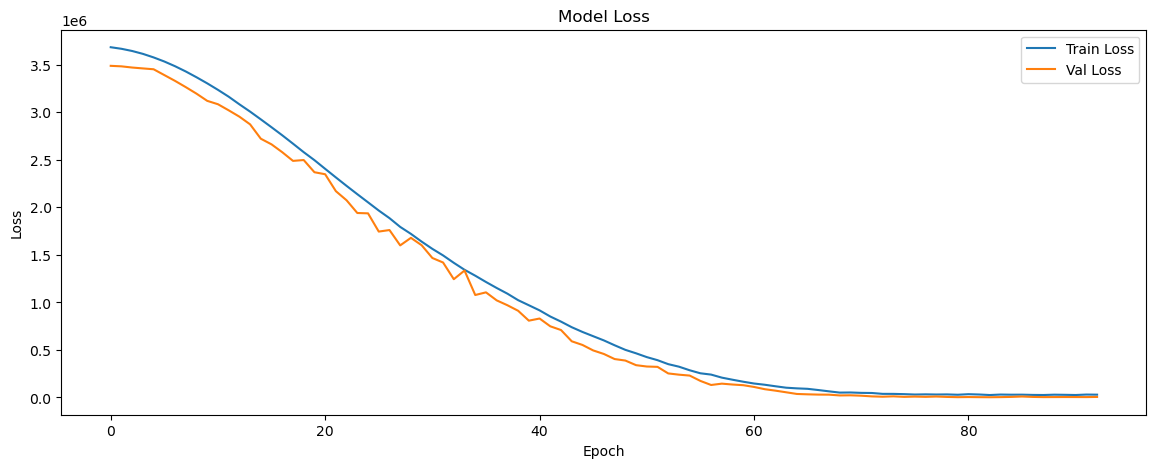

In [310]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [311]:
y_pred = model.predict(X_test)
n = len(y_test)
p = X_test.shape[1]
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f"Adjusted R²: {adjusted_r2}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error: 3598.336943748982
R² Score: 0.9943949917642843
Adjusted R²: 0.9940196279891341


In [312]:
X_single = X_test.iloc[0].values.reshape(1, -1)

In [313]:
y_single_pred = model.predict(X_single)
print(f'Single prediction: {y_single_pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Single prediction: [[908.2057]]


In [314]:
y_test.iloc[0]

870.0

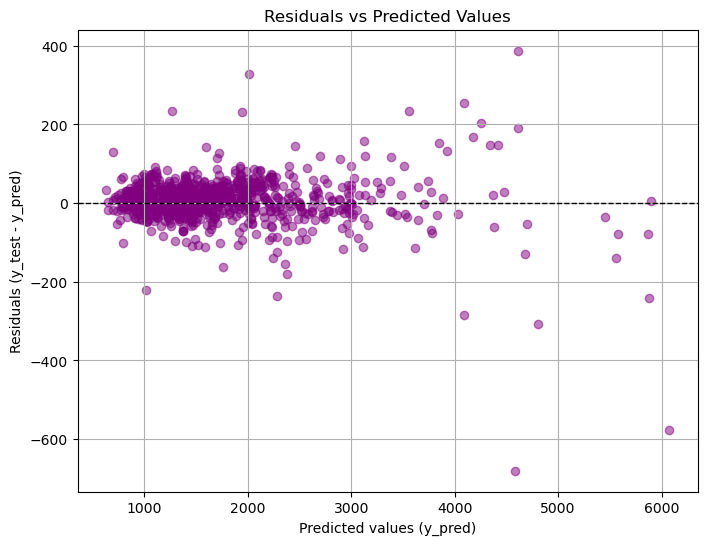

In [319]:
y_test = y_test.ravel()  # or y_test.flatten()
y_pred = y_pred.ravel()  # or y_pred.flatten()

# Now compute the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.grid(True)
